<a href="https://colab.research.google.com/github/HiwaTase/Machine-Learning/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step1**

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/HiwaTase/Machine-Learning/main/healthINS_balanced.csv'

df = pd.read_csv(url)

In [2]:
import pandas as pd

# Drop columns
df = df.drop(["marst","WKSWORK2", "classwkr", "empstat", "vetstat","school","cit2","metro","region"], axis=1)

# Top-code the 'inctot' column
df['inctot'] = df['inctot'].apply(lambda x: min(max(x, 0), 500000))

print(df.isnull().sum())



nohealthins    0
race2          0
inctot         0
uhrswork       0
age            0
educ_att       0
female         0
dtype: int64


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('nohealthins', axis=1)
y = df['nohealthins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Training set target class distribution:")
print(y_train.value_counts())

print("\nTesting set target class distribution:")
print(y_test.value_counts())


Training set target class distribution:
nohealthins
1    29704
0    26184
Name: count, dtype: int64

Testing set target class distribution:
nohealthins
1    7427
0    6546
Name: count, dtype: int64


In [4]:
df.head()

,nohealthins,race2,inctot,uhrswork,age,educ_att,female
0,0,white,36300,0,71,HS or GED,0
1,0,white,12500,0,68,Less than HS,1
2,0,white,24100,32,44,Less than HS,1
3,0,latino,10900,0,87,Less than HS,1
4,0,white,24200,16,77,HS or GED,0



**Step2**

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Print the original features
print("Original features:\n", list(X_train.columns), "\n")

# Apply ColumnTransformer
ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['inctot', 'age', 'uhrswork']),
     ("onehot", OneHotEncoder(sparse=False), ['race2', 'educ_att'])],
    remainder='passthrough'
)



Original features:
 ['race2', 'inctot', 'uhrswork', 'age', 'educ_att', 'female'] 



In [6]:
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

# Convert the transformed data back to a DataFrame for better visualization
feature_names = ct.get_feature_names_out()
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)

# Print the transformed features
print("Transformed training set features:\n", X_train_transformed_df.head())

# Print the distribution of target classes in training and testing sets
print("Training set target class distribution:")
print(y_train.value_counts())

print("\nTesting set target class distribution:")
print(y_test.value_counts())

Transformed training set features:
    scaling__inctot  scaling__age  scaling__uhrswork  onehot__race2_Other  \
0        -0.646781     -0.435304          -1.155417                  0.0   
1         1.535379      0.866503           1.162346                  0.0   
2        -0.646781     -1.567311          -1.155417                  0.0   
3        -0.354845      1.998509          -1.155417                  0.0   
4        -0.646781     -0.039102          -1.155417                  0.0   

   onehot__race2_asian  onehot__race2_black  onehot__race2_latino  \
0                  0.0                  0.0                   0.0   
1                  0.0                  0.0                   0.0   
2                  0.0                  0.0                   0.0   
3                  0.0                  0.0                   0.0   
4                  0.0                  0.0                   1.0   

   onehot__race2_native american  onehot__race2_white  \
0                            0.0   

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Step3**

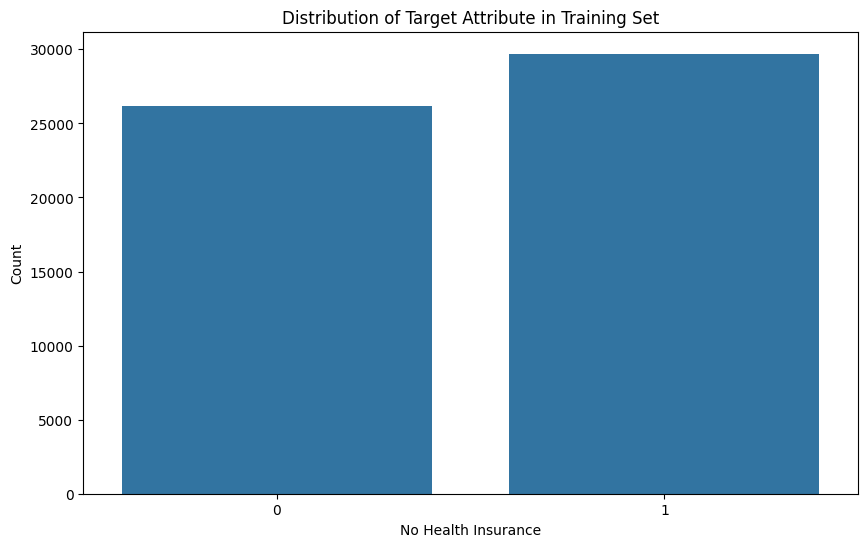

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)
plt.title('Distribution of Target Attribute in Training Set')
plt.xlabel('No Health Insurance')
plt.ylabel('Count')
plt.show()

**Step4**

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
# Train and Evaluate K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_transformed, y_train)
y_pred_knn = knn.predict(X_test_transformed)

print("\nK-Nearest Neighbor Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))




K-Nearest Neighbor Model Performance:
Accuracy: 0.7402132684462893
Confusion Matrix:
 [[4541 2005]
 [1625 5802]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.71      6546
           1       0.74      0.78      0.76      7427

    accuracy                           0.74     13973
   macro avg       0.74      0.74      0.74     13973
weighted avg       0.74      0.74      0.74     13973



In [10]:
# Train and Evaluate Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_transformed, y_train)
y_pred_rf = rf.predict(X_test_transformed)

print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))




Random Forest Model Performance:
Accuracy: 0.7420739998568668
Confusion Matrix:
 [[4555 1991]
 [1613 5814]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      6546
           1       0.74      0.78      0.76      7427

    accuracy                           0.74     13973
   macro avg       0.74      0.74      0.74     13973
weighted avg       0.74      0.74      0.74     13973



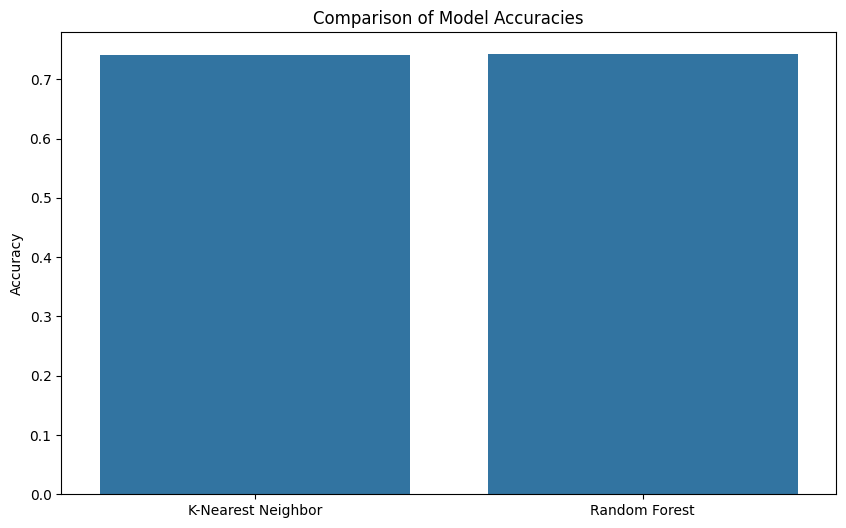

In [11]:
# Compare the Performance
models = ['K-Nearest Neighbor', 'Random Forest']
accuracies = [accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_rf)]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.show()


K-Nearest Neighbor Model Performance:
Accuracy: 0.7402132684462893
Precision: 0.7431791981555015
Recall: 0.7812037161707284
F1 Score: 0.7617172115005908
Confusion Matrix:
 [[4541 2005]
 [1625 5802]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.71      6546
           1       0.74      0.78      0.76      7427

    accuracy                           0.74     13973
   macro avg       0.74      0.74      0.74     13973
weighted avg       0.74      0.74      0.74     13973


Random Forest Model Performance:
Accuracy: 0.7420739998568668
Precision: 0.7449071108263934
Recall: 0.7828194425743907
F1 Score: 0.7633928571428571
Confusion Matrix:
 [[4555 1991]
 [1613 5814]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72      6546
           1       0.74      0.78      0.76      7427

    accuracy                           0.74     13973
   macro avg

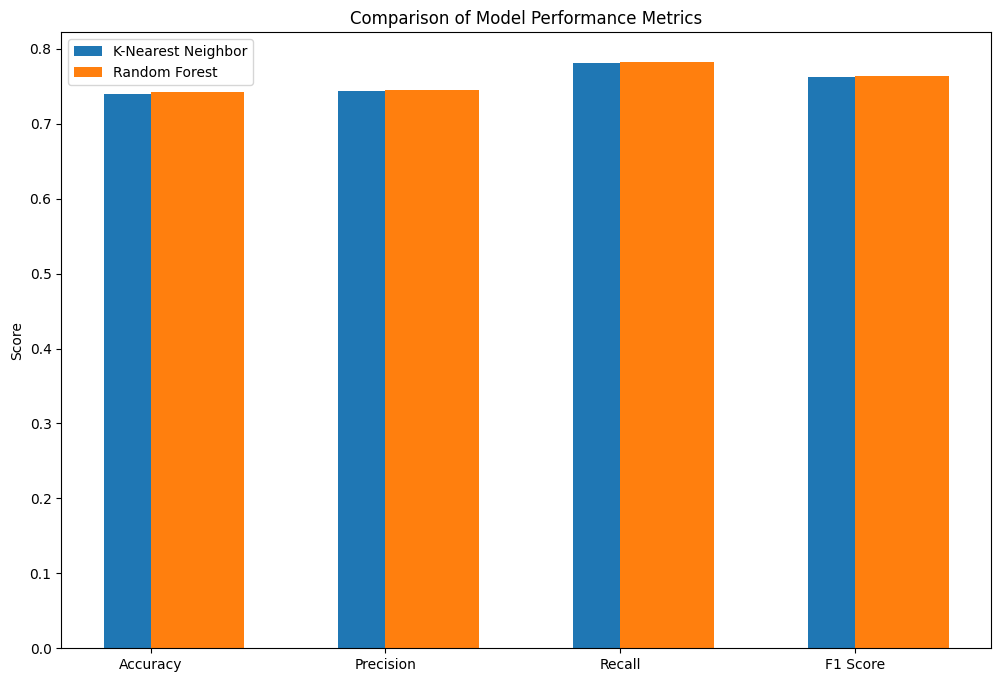

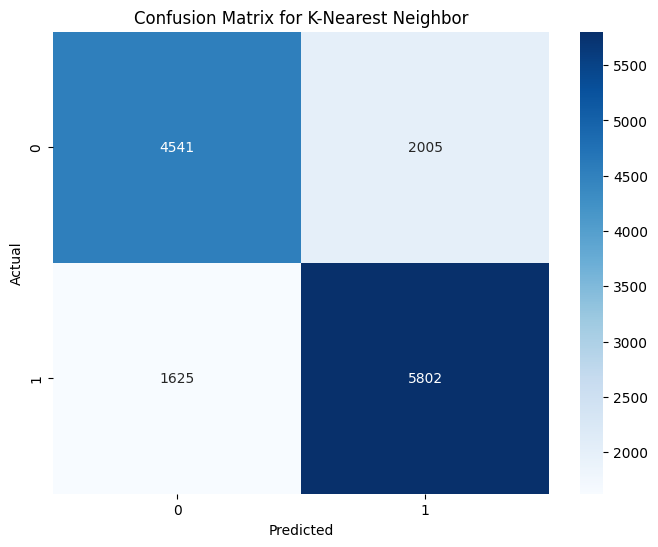

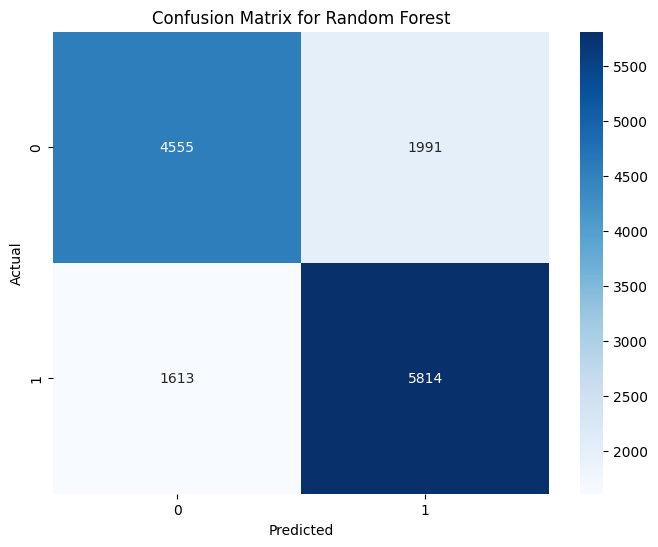

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# Train and Evaluate K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_transformed, y_train)
y_pred_knn = knn.predict(X_test_transformed)

print("\nK-Nearest Neighbor Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Train and Evaluate Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_transformed, y_train)
y_pred_rf = rf.predict(X_test_transformed)

print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Compare the Performance
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
knn_scores = [accuracy_score(y_test, y_pred_knn), precision_score(y_test, y_pred_knn), recall_score(y_test, y_pred_knn), f1_score(y_test, y_pred_knn)]
rf_scores = [accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf), recall_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf)]

plt.figure(figsize=(12, 8))
x = range(len(metrics))
plt.bar(x, knn_scores, width=0.4, label='K-Nearest Neighbor', align='center')
plt.bar(x, rf_scores, width=0.4, label='Random Forest', align='edge')
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Comparison of Model Performance Metrics')
plt.legend()
plt.show()

# Plot Confusion Matrix for K-Nearest Neighbor
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for K-Nearest Neighbor')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Step5**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

X_transformed = ct.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, stratify=y, random_state=42)

# Define the function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return precision, recall, f1

# Initialize models
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)

# 1. Run with default parameters
knn_precision, knn_recall, knn_f1 = evaluate_model(knn, X_train, X_test, y_train, y_test)
rf_precision, rf_recall, rf_f1 = evaluate_model(rf, X_train, X_test, y_train, y_test)

print("\nK-Nearest Neighbor Model (Default Parameters):")
print(f"Precision: {knn_precision:.4f}, Recall: {knn_recall:.4f}, F1 Score: {knn_f1:.4f}")

print("\nRandom Forest Model (Default Parameters):")
print(f"Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1 Score: {rf_f1:.4f}")

# 2. Cross-validation
def cross_validate_model(model, X, y):
    precision = cross_val_score(model, X, y, cv=5, scoring=make_scorer(precision_score)).mean()
    recall = cross_val_score(model, X, y, cv=5, scoring=make_scorer(recall_score)).mean()
    f1 = cross_val_score(model, X, y, cv=5, scoring=make_scorer(f1_score)).mean()
    return precision, recall, f1

knn_cv_precision, knn_cv_recall, knn_cv_f1 = cross_validate_model(knn, X_transformed, y)
rf_cv_precision, rf_cv_recall, rf_cv_f1 = cross_validate_model(rf, X_transformed, y)

print("\nK-Nearest Neighbor Model (Cross-Validation):")
print(f"Precision: {knn_cv_precision:.4f}, Recall: {knn_cv_recall:.4f}, F1 Score: {knn_cv_f1:.4f}")

print("\nRandom Forest Model (Cross-Validation):")
print(f"Precision: {rf_cv_precision:.4f}, Recall: {rf_cv_recall:.4f}, F1 Score: {rf_cv_f1:.4f}")

# 3. Grid Search for Hyperparameter Tuning
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None]
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='f1')
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='f1')

knn_grid_search.fit(X_train, y_train)
rf_grid_search.fit(X_train, y_train)

best_knn = knn_grid_search.best_estimator_
best_rf = rf_grid_search.best_estimator_

worst_knn_params = knn_grid_search.cv_results_['params'][knn_grid_search.cv_results_['rank_test_score'].argmax()]
worst_rf_params = rf_grid_search.cv_results_['params'][rf_grid_search.cv_results_['rank_test_score'].argmax()]

print("\nBest K-Nearest Neighbor Parameters:")
print(knn_grid_search.best_params_)
print("\nBest Random Forest Parameters:")
print(rf_grid_search.best_params_)

# Evaluate the best models
best_knn_precision, best_knn_recall, best_knn_f1 = evaluate_model(best_knn, X_train, X_test, y_train, y_test)
best_rf_precision, best_rf_recall, best_rf_f1 = evaluate_model(best_rf, X_train, X_test, y_train, y_test)

print("\nBest K-Nearest Neighbor Model:")
print(f"Precision: {best_knn_precision:.4f}, Recall: {best_knn_recall:.4f}, F1 Score: {best_knn_f1:.4f}")

print("\nBest Random Forest Model:")
print(f"Precision: {best_rf_precision:.4f}, Recall: {best_rf_recall:.4f}, F1 Score: {best_rf_f1:.4f}")

# Evaluate the worst models (for comparison)
worst_knn = KNeighborsClassifier(**worst_knn_params)
worst_rf = RandomForestClassifier(random_state=42, **worst_rf_params)

worst_knn_precision, worst_knn_recall, worst_knn_f1 = evaluate_model(worst_knn, X_train, X_test, y_train, y_test)
worst_rf_precision, worst_rf_recall, worst_rf_f1 = evaluate_model(worst_rf, X_train, X_test, y_train, y_test)

print("\nWorst K-Nearest Neighbor Model:")
print(f"Precision: {worst_knn_precision:.4f}, Recall: {worst_knn_recall:.4f}, F1 Score: {worst_knn_f1:.4f}")

print("\nWorst Random Forest Model:")
print(f"Precision: {worst_rf_precision:.4f}, Recall: {worst_rf_recall:.4f}, F1 Score: {worst_rf_f1:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



K-Nearest Neighbor Model (Default Parameters):
Precision: 0.7430, Recall: 0.7820, F1 Score: 0.7620

Random Forest Model (Default Parameters):
Precision: 0.7449, Recall: 0.7827, F1 Score: 0.7633

K-Nearest Neighbor Model (Cross-Validation):
Precision: 0.7499, Recall: 0.7253, F1 Score: 0.7374

Random Forest Model (Cross-Validation):
Precision: 0.7427, Recall: 0.7798, F1 Score: 0.7608


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor